### ЛР3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")


In [3]:
# чтение обучающей выборки
data = pd.read_csv('train.csv')

In [4]:
# уберем непонятный для нас параметр, чтобы он не помешал в будущем
data.drop(['Name','Sex','Ticket','Embarked','Cabin','PassengerId', 'Parch'], axis = 1, inplace = True)
data

,Survived,Pclass,Age,SibSp,Fare
0,0,3,22.0,1,7.2500
1,1,1,38.0,1,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,1,53.1000
4,0,3,35.0,0,8.0500
...,...,...,...,...,...
886,0,2,27.0,0,13.0000
887,1,1,19.0,0,30.0000
888,0,3,NaN,1,23.4500
889,1,1,26.0,0,30.0000


In [5]:
# заполнение NaN ячеек цифрой 1
data = data.fillna(1)
data

,Survived,Pclass,Age,SibSp,Fare
0,0,3,22.0,1,7.2500
1,1,1,38.0,1,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,1,53.1000
4,0,3,35.0,0,8.0500
...,...,...,...,...,...
886,0,2,27.0,0,13.0000
887,1,1,19.0,0,30.0000
888,0,3,1.0,1,23.4500
889,1,1,26.0,0,30.0000


In [6]:
parts = np.split(data, [4,5], axis=1)
X = parts[0]
Y = parts[1]
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    Survived  Pclass   Age  SibSp
0       0.0     3.0  22.0    1.0
1       1.0     1.0  38.0    1.0
2       1.0     3.0  26.0    0.0
3       1.0     1.0  35.0    1.0
4       0.0     3.0  35.0    0.0 

Выходные данные:

       Fare
0   7.2500
1  71.2833
2   7.9250
3  53.1000
4   8.0500


## Разделение выборки

In [7]:
 X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, test_size=0.03)

In [8]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      Survived  Pclass   Age  SibSp
796       1.0     1.0  49.0    0.0
222       0.0     3.0  51.0    0.0
370       1.0     1.0  25.0    1.0
71        0.0     3.0  16.0    5.0
391       1.0     3.0  21.0    0.0 

Входные параметры тестовой выборки:

      Survived  Pclass   Age  SibSp
373       0.0     1.0  22.0    0.0
296       0.0     3.0  23.5    0.0
166       1.0     1.0   1.0    0.0
40        0.0     3.0  40.0    1.0
32        1.0     3.0   1.0    0.0 

Выходные параметры обучающей выборки:

         Fare
796  25.9292
222   8.0500
370  55.4417
71   46.9000
391   7.7958 

Выходные параметры тестовой выборки:

          Fare
373  135.6333
296    7.2292
166   55.0000
40     9.4750
32     7.7500


In [9]:
# Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(864, 4)
(27, 4)
(864, 1)
(27, 1)


# Модель ближайших соседей для произвольного гиперпараметра K

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
# Решение задачи регрессии методом 2, 5 и 10 ближайших соседей
Regressor_2NN = KNeighborsRegressor(n_neighbors = 2) 
Regressor_5NN = KNeighborsRegressor(n_neighbors = 5)
Regressor_10NN = KNeighborsRegressor(n_neighbors = 10) 
print('Пример модели:\n\n', Regressor_10NN)

Пример модели:

 KNeighborsRegressor(n_neighbors=10)


In [12]:
Regressor_2NN.fit(X_train, Y_train)
Regressor_5NN.fit(X_train, Y_train)
Regressor_10NN.fit(X_train, Y_train)

target_2NN = Regressor_2NN.predict(X_test)
target_5NN = Regressor_5NN.predict(X_test)
target_10NN = Regressor_10NN.predict(X_test)

print('Пример предсказанных значений для 2 ближайших соседей:\n\n', target_2NN[:5], '\n ...')
print('Пример предсказанных значений для 5 ближайших соседей:\n\n', target_5NN[:5], '\n ...')
print('Пример предсказанных значений для 10 ближайших соседей:\n\n', target_10NN[:5], '\n ...')

Пример предсказанных значений для 2 ближайших соседей:

 [[66.14375]
 [ 8.5604 ]
 [68.71665]
 [21.7    ]
 [ 7.75   ]] 
 ...
Пример предсказанных значений для 5 ближайших соседей:

 [[82.25916]
 [ 8.19   ]
 [46.52666]
 [17.95916]
 [ 7.77834]] 
 ...
Пример предсказанных значений для 10 ближайших соседей:

 [[58.78958]
 [ 8.16416]
 [59.75791]
 [22.77208]
 [ 7.66751]] 
 ...


## Оценка качества регрессии (Метрики качества)

In [13]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score , accuracy_score

In [14]:
# Оценка средней абсолютной ошибки
print('Средняя абсолютная ошибка для 2 ближайших соседей:',mean_absolute_error(Y_test,
target_2NN))
print('Средняя абсолютная ошибка для 5 ближайших соседей:',mean_absolute_error(Y_test,
target_5NN))
print('Средняя абсолютная ошибка для 10 ближайших соседей:',mean_absolute_error(Y_test,
target_10NN))

Средняя абсолютная ошибка для 2 ближайших соседей: 12.907707407407408
Средняя абсолютная ошибка для 5 ближайших соседей: 12.011633333333336
Средняя абсолютная ошибка для 10 ближайших соседей: 12.275924814814815


In [15]:
# Оценка средней квадратичной ошибки
print('Средняя квадратичная ошибка для 2 ближайших соседей:',mean_squared_error(Y_test,
target_2NN))
print('Средняя квадратичная ошибка для 5 ближайших соседей:',mean_squared_error(Y_test,
target_5NN))
print('Средняя квадратичная ошибка для 10 ближайших соседей:',mean_squared_error(Y_test
, target_10NN))

Средняя квадратичная ошибка для 2 ближайших соседей: 901.9070041387037
Средняя квадратичная ошибка для 5 ближайших соседей: 418.9014621938815
Средняя квадратичная ошибка для 10 ближайших соседей: 472.013474794248


In [16]:
# Оценка коэффициента детерминации
print('Коэффициент детерминации для 2 ближайших соседей:',r2_score(Y_test, target_2NN))
print('Коэффициент детерминации для 5 ближайших соседей:',r2_score(Y_test, target_5NN))
print('Коэффициент детерминации для 10 ближайших соседей:',r2_score(Y_test, target_10NN
))

Коэффициент детерминации для 2 ближайших соседей: 0.2839500393110812
Коэффициент детерминации для 5 ближайших соседей: 0.6674220577509455
Коэффициент детерминации для 10 ближайших соседей: 0.625254900427536


## Подбор гиперпараметров

## GridSearch через среднюю квадратичную ошибку
Рассмотрим все количества ближайших соседей от 1 до 100, чтобы найти лучший результат. Возьмем 10 фолдов.

In [17]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [18]:
n_range = np.array(range(1, 101, 1))
tuned_parameters = [{'n_neighbors': n_range}]
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
gs.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])}],
             scoring='neg_mean_squared_error')

In [19]:
print('Лучшая модель:\n\n', gs.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs.best_params_) 
print('\nЛучшее значение средней квадратичной ошибки:\n\n',gs.best_score_)

Лучшая модель:

 KNeighborsRegressor(n_neighbors=11)

Лучшее число ближайших соседей:

 {'n_neighbors': 11}

Лучшее значение средней квадратичной ошибки:

 -1761.5508936591825


Изменение качества тестовой выборки в зависимости от кол-ва соседей:



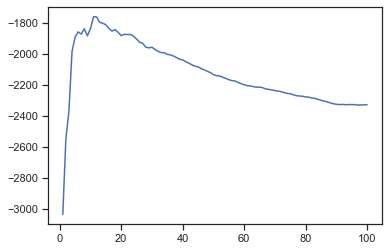

In [20]:
print('Изменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs.cv_results_['mean_test_score'])

## GridSearch через коэффициент детерминации

Лучшая модель:

 KNeighborsRegressor(n_neighbors=18)

Лучшее число ближайших соседей:

 {'n_neighbors': 18}

Лучшее значение коэффициента детерминации:

 0.27330085735322024

Изменение качества тестовой выборки в зависимости от кол-ва соседей:



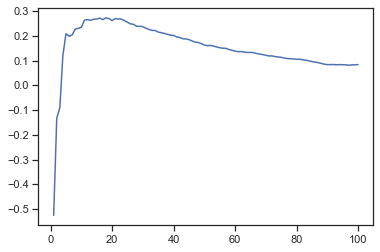

In [21]:
gs_det = GridSearchCV(KNeighborsRegressor(), tuned_parameters, cv=10, scoring='r2') 
gs_det.fit(X_train, Y_train)

print('Лучшая модель:\n\n', gs_det.best_estimator_)
print('\nЛучшее число ближайших соседей:\n\n',gs_det.best_params_)
print('\nЛучшее значение коэффициента детерминации:\n\n',gs_det.best_score_)
print('\nИзменение качества тестовой выборки в зависимости от кол-ва соседей:\n') 
plt.plot(n_range, gs_det.cv_results_['mean_test_score'])

## Кросс-валидация

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
scores_2NN = cross_val_score(KNeighborsRegressor(n_neighbors = 2), X, Y, cv=5, scoring= 'r2')
scores_5NN = cross_val_score(KNeighborsRegressor(n_neighbors = 5), X, Y, cv=5, scoring= 'r2')
scores_10NN = cross_val_score(KNeighborsRegressor(n_neighbors = 10), X, Y, cv=5, scoring = 'r2')
scores_50NN = cross_val_score(KNeighborsRegressor(n_neighbors = 50), X, Y, cv=5, scoring = 'r2')
scores_100NN = cross_val_score(KNeighborsRegressor(n_neighbors = 100), X, Y, cv=5, scoring = 'r2')

print('Пример значений коэф. детерминации для 5 фолдов для метода 2 ближайших соседей: \n', scores_2NN, '\n\n')
print('Пример значений коэф. детерминации для 5 фолдов для метода 5 ближайших соседей: \n', scores_5NN, '\n\n')
print('Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: \n', scores_10NN, '\n\n')
print('Пример значений коэф. детерминации для 5 фолдов для метода 50 ближайших соседей: \n', scores_50NN, '\n\n')
print('Пример значений коэф. детерминации для 5 фолдов для метода 100 ближайших соседей: \n', scores_100NN, '\n\n')

print('Усредненное значение коэффициента детерминации для:\n') 
print('- 2 ближайших соседей:', np.mean(scores_2NN), '\n') 
print('- 5 ближайших соседей:', np.mean(scores_5NN), '\n') 
print('- 10 ближайших соседей:', np.mean(scores_10NN), '\n') 
print('- 50 ближайших соседей:', np.mean(scores_50NN), '\n') 
print('- 100 ближайших соседей:', np.mean(scores_100NN), '\n')

Пример значений коэф. детерминации для 5 фолдов для метода 2 ближайших соседей: 
 [ 0.30830813  0.51102966  0.11351227 -0.20637581  0.2082538 ] 


Пример значений коэф. детерминации для 5 фолдов для метода 5 ближайших соседей: 
 [0.28711235 0.33867249 0.10880284 0.08465877 0.3581599 ] 


Пример значений коэф. детерминации для 5 фолдов для метода 10 ближайших соседей: 
 [0.34166201 0.38655715 0.14117213 0.28452217 0.2883947 ] 


Пример значений коэф. детерминации для 5 фолдов для метода 50 ближайших соседей: 
 [0.14346117 0.1248418  0.14231074 0.12316471 0.14296374] 


Пример значений коэф. детерминации для 5 фолдов для метода 100 ближайших соседей: 
 [0.04099073 0.03945595 0.07795575 0.05336465 0.08227155] 


Усредненное значение коэффициента детерминации для:

- 2 ближайших соседей: 0.18694561138232885 

- 5 ближайших соседей: 0.23548126907370337 

- 10 ближайших соседей: 0.28846163209364245 

- 50 ближайших соседей: 0.13534843218545478 

- 100 ближайших соседей: 0.05880772437701802 
